# Multiple linear regression on car dataset

In [50]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [40]:
#DATA EXPLORATION
#Collecting the data
data = pd.read_csv(r"C:\Users\pavanreddy\CarPrice_Assignment.csv")
data.info()
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [41]:
describe = data.describe()
describe

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [42]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


Below columns are useless doesnot have any relation between other columns

In [43]:
data1 = data.copy()
data = data.drop('symboling', axis = 1)
data = data.drop('car_ID' , axis = 1)
data = data.drop('CarName' , axis = 1)
data = data.drop('enginelocation' , axis = 1)

In [44]:
data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Mapping the object values to numerical because it will make ease to the compiler

In [45]:

data['carbody'] = data['carbody'].map({'convertible' : 0 , 'hatchback' : 1 , 'sedan' : 2 , 'wagon' : 3 , 'hardtop' : 4 ,})
data['fueltype'] =  data['fueltype'].map({'gas':0 , 'diesel':1})
data['drivewheel'] = data['drivewheel'].map({'rwd' : 0 , 'fwd':1 , '4wd':2})
data['aspiration'] =  data['aspiration'].map({'std': 0 , 'turbo' : 1})
data['doornumber'] = data['doornumber'].map({'two': 0 , 'four' : 1})
data['enginetype'] = data['enginetype'].map({'dohc':0 , 'ohcv':1 , 'ohc' : 2 , 'l' :3 , 'rotor':4 , 'ohcf':5 ,'dohcv':6 })
data['fuelsystem'] = data['fuelsystem'].map({'mpfi':0 , '2bbl' : 1 , '1bbl':2 , 'mfi' : 3 , 'spfi' : 4 , '4bbl':5 , 'idi':6 ,'spdi' : 7 })
data['cylindernumber'] = data['cylindernumber'].map({'four' : 0 , 'six' : 1 , 'five':2 , 'three' : 3 , 'twelve' : 4 , 'two' : 5 , 'eight':6})

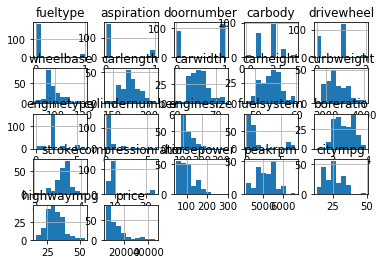

In [46]:
#hist plot
data.hist()
corr = data.corr()
#considering all the independent variables and we will verify the mean square error and r2_score 
X  = data.iloc[: ,0: -1]
y= data.iloc[:,-1]

simply by using correlation we can find the relation between variables and based on that we can choose number of varibales for model. But here iam going to use all the variables in the model.

In [47]:
corr

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
fueltype,1.000000,0.401397,0.191491,0.157580,-0.132257,0.308346,0.212679,0.233880,0.284631,0.217275,0.028837,-0.013773,0.069594,0.697304,0.054451,0.241829,0.984356,-0.163926,-0.476883,0.255963,0.191392,0.105679
aspiration,0.401397,1.000000,0.031792,0.021276,-0.066465,0.257611,0.234539,0.300567,0.087311,0.324902,0.014505,-0.046509,0.108217,0.495035,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.191491,0.031792,1.000000,0.447534,0.098954,0.447357,0.398568,0.207168,0.552208,0.197379,0.037170,-0.131762,0.020742,-0.010790,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,0.157580,0.021276,0.447534,1.000000,-0.056886,0.368772,0.376842,0.191511,0.483675,0.240367,0.127736,-0.020543,0.172381,-0.047186,0.224976,0.000598,0.156686,0.047234,-0.147031,-0.095826,-0.126939,0.161294
drivewheel,-0.132257,-0.066465,0.098954,-0.056886,1.000000,-0.459745,-0.485649,-0.470751,0.019719,-0.575111,0.192637,-0.318423,-0.524307,0.023502,-0.481827,-0.071591,-0.127479,-0.518686,0.039417,0.449581,0.452220,-0.577992
wheelbase,0.308346,0.257611,0.447357,0.368772,-0.459745,1.000000,0.874587,0.795144,0.589435,0.776386,-0.136452,0.268411,0.569329,0.023783,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.212679,0.234539,0.398568,0.376842,-0.485649,0.874587,1.000000,0.841118,0.491029,0.877728,-0.172093,0.301909,0.683360,-0.060677,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.233880,0.300567,0.207168,0.191511,-0.470751,0.795144,0.841118,1.000000,0.279210,0.867032,-0.098253,0.506032,0.735433,0.003398,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.284631,0.087311,0.552208,0.483675,0.019719,0.589435,0.491029,0.279210,1.000000,0.295572,0.009540,-0.117759,0.067149,-0.050781,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.217275,0.324902,0.197379,0.240367,-0.575111,0.776386,0.877728,0.867032,0.295572,1.000000,-0.165371,0.448897,0.850594,-0.001080,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305


Model selection : since it is a linear relation problem we are going to use linear regression algorithm. 

In [48]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size = 0.2)
#sns.pairplot(data , size = 5)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train , y_train)
y_pred = linreg.predict(x_test)
comparison = pd.DataFrame()
comparison['actual'] = y_test
comparison['predicted'] = y_pred
comparison

,actual,predicted
93,7349.0,6438.723648
45,8916.5,5034.871084
98,8249.0,4993.917371
108,13200.0,20498.319396
135,15510.0,12764.899802
88,9279.0,7202.562321
131,9895.0,12210.661961
139,7053.0,9056.863588
120,6229.0,6551.067204
67,25552.0,25969.984911


Verifying the most important mean absolute error , r2 score , accuracy.

In [51]:
from sklearn.metrics import mean_absolute_error , r2_score
print("mean absolute error" , mean_absolute_error(y_test , y_pred))
print('r2_score' , r2_score(y_test , y_pred))
print("score" ,linreg.score(x_test , y_test))
print("prediction for unknown value" , linreg.predict(np.array([[0, 0,0,0,0,88.6,168.8,64.1 , 48.8 , 2548,0,0,130 , 0 , 3.47 , 2.68 , 9 , 111,5000, 21, 27]])))

mean absolute error 2345.1285042679074
r2_score 0.7968766345156204
score 0.7968766345156204
prediction for unknown value [13227.31968043]


Hence its our choice how many independent variables we use.
I had got good results from above type.